## MD simulation of a DNA Helix

In [57]:
import MDAnalysis as mda
import math
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [58]:
# import topology and trajectory from MD run
top='nuc.pdb'
u=mda.Universe(top,'trajectory.dcd')

In [59]:
# transform such that main axis lies along z-axis
u.atoms.align_principal_axis(0,[0,0,1])
u.residues
# prepare data structure (1 segment with 2 chains A and B)
chain_A = u.select_atoms("resid 1:24")
chain_B = u.select_atoms("resid 25:48")

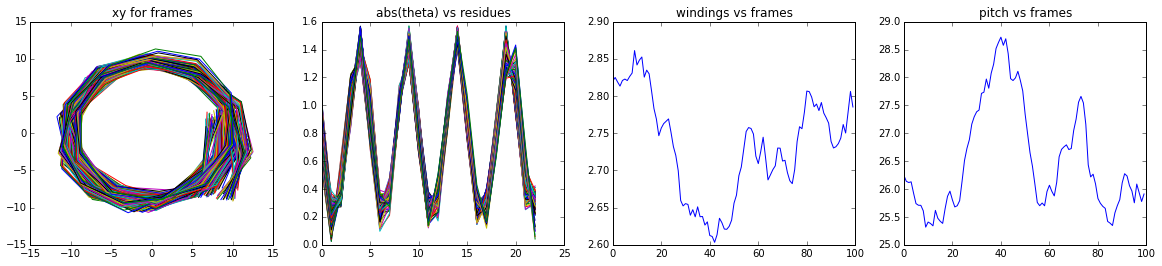

In [69]:
fig = plt.figure(figsize=(20,4))
ax1 = fig.add_subplot(1,4,1)
ax2 = fig.add_subplot(1,4,2)
ax3 = fig.add_subplot(1,4,3)
ax4 = fig.add_subplot(1,4,4)

# for chain A in all trajectory frames
# calculate winding number and pitch
windingvec = []; pitchvec = [];
for ts in u.trajectory:
    thetavec = []
    xvec = []; yvec = []; thetasum = 0.; 
    zmin = 1000.; zmax = -1000.
    for at in chain_A.atoms[chain_A.atoms.names == 'P']: # at backbone phosphate
        x = at.position[0]
        y = at.position[1]
        z = at.position[2]
        if (z > zmax):
            zmax = z
        if (z < zmin):
            zmin = z
        theta = abs(math.atan(y/x))
        xvec.append(x)
        yvec.append(y)
        thetavec.append(theta)
        thetasum += theta  
    ax1.set_title('xy for frames')
    ax1.plot(xvec,yvec)
    ax2.set_title('abs(theta) vs residues')
    ax2.plot(thetavec)
    windingvec.append(thetasum / (2. * math.pi)) # winding number
    pitchvec.append((2.* math.pi *(zmax-zmin)/thetasum)) # pitch of helix
ax3.set_title('windings vs frames')
ax3.plot(windingvec)
ax4.set_title('pitch vs frames')
ax4.plot(pitchvec)

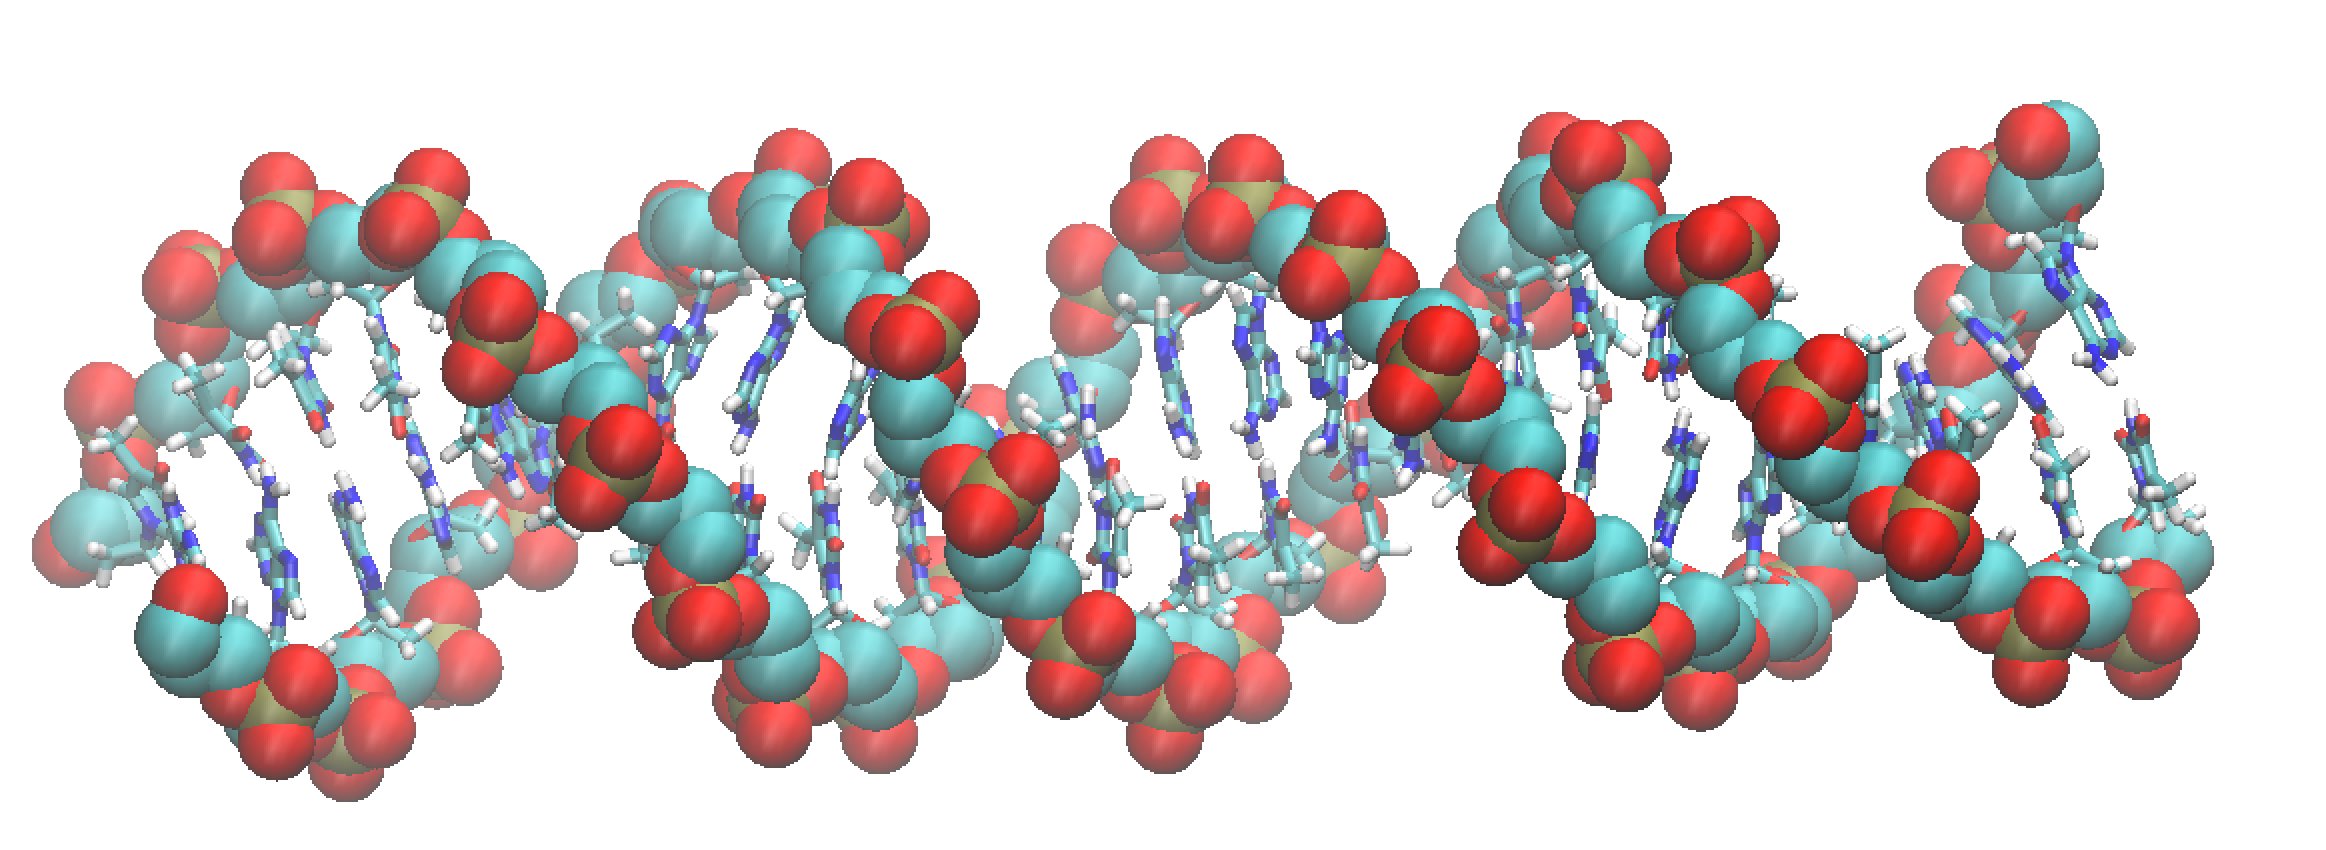

In [50]:
from IPython.display import Image
Image(filename='nuc.png') # picture by VMD

In [46]:
import io # view trajectory video, first and last residue of chain A in yellow
import base64
from IPython.display import HTML

# video files produced in VMD
video = io.open('nuc.mp4', 'r+b').read()
encoded = base64.b64encode(video)
video2 = io.open('nuc_vert.mp4', 'r+b').read()
encoded2 = base64.b64encode(video2)
HTML(data='''<table><tr><td><video alt="test" controls>
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video></td><td><video alt="test" controls>
                <source src="data:video/mp4;base64,{1}" type="video/mp4" />
             </video></td></tr></table>'''.format(encoded.decode('ascii'), encoded2.decode('ascii')))